# Non Hierarchical Clustering using __GMM__ (Gaussian Mixture Model), __VBGMM__ (Variational Bayesian Gaussian Mixture Model)

## GMM

- Each data is labeled to find which Gaussian distribution it has the highest probability of belonging to.

## VBGMM

- Assuming multiple Gaussian distributions, each data is labeled to find which Gaussian distribution it has the highest probability of belonging to.
- Based on Bayesian estimation, the number of clusters and the shape of the distribution are obtained while calculating the probability distribution.

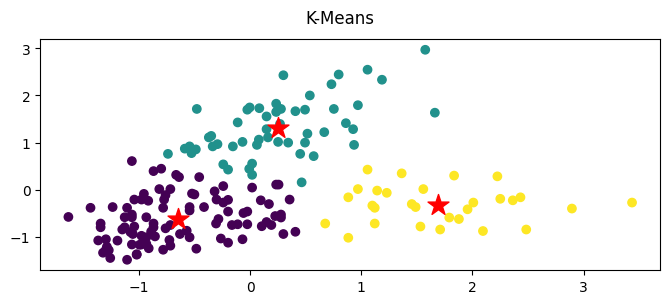

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn import preprocessing
from sklearn import mixture


# Prepare Dataset
df_wine_classification = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None
)

df_wine = df_wine_classification[
    [0, 10, 13]
]
df_wine.columns = [
    '1) Alcohol',
    '10)Color intensity',
    '13)Proline'
]

# Standardize and visualize.
X = df_wine[
    ['10)Color intensity', '13)Proline']
]

sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine['1) Alcohol']

# KMeans Clustering (for comparison with GMM Clustering)
km = cluster.KMeans(
    n_clusters=3,
    n_init=10
)
z_km = km.fit(X_norm)

plt.figure(figsize=(8, 3))
plt.scatter(
    x,
    y,
    c=z_km.labels_
)
plt.scatter(
    z_km.cluster_centers_[:, 0],
    z_km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red'
)
plt.suptitle('K-Means')
plt.show()

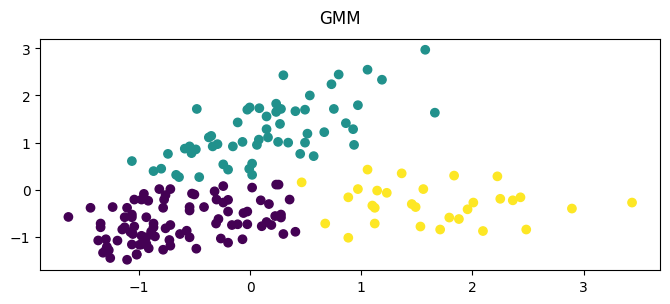

In [2]:
# GMM Clustering
gmm = mixture.GaussianMixture(
    # must specify clusters number
    n_components=3,
    covariance_type='full'
)
Z_gmm = gmm.fit(X_norm)
Z_gmm = Z_gmm.predict(X_norm)

plt.figure(figsize=(8, 3))
plt.scatter(
    x,
    y,
    c=Z_gmm
)
plt.suptitle('GMM')
plt.show()